# backpropagation and visualization of the neural network weights



In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv", index_col=0)
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv", index_col=0)


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [3]:
layers = [
    {"output_dim": 5, "activation": "sigmoid"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]])


In [4]:
mlp.layers[0].weights

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

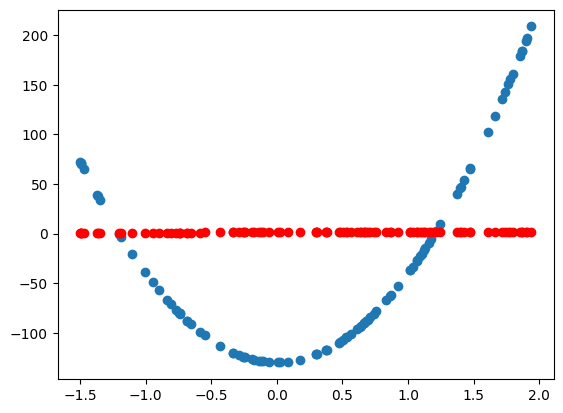

In [5]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [6]:
mlp.layers[0].weights[:, 0]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

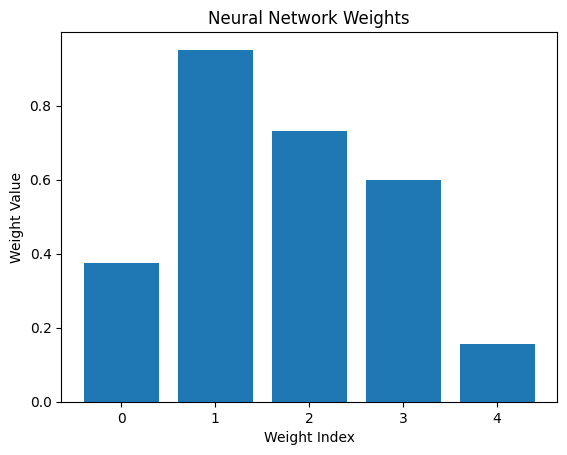

In [7]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()


now we want to calculate the partial derivative over the layers


In [8]:
mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())

([array([[1.042054  ],
         [0.1957077 ],
         [4.02839215],
         [3.28045898],
         [5.28258598]]),
  array([[-13.18660108, -10.2723877 , -11.14727701, -11.82132264,
          -14.74151043]])],
 [array([[-1.32548195],
         [-0.59349126],
         [-8.30357292],
         [-5.50791621],
         [-5.70829111]]),
  array([[-31.84778151]])])

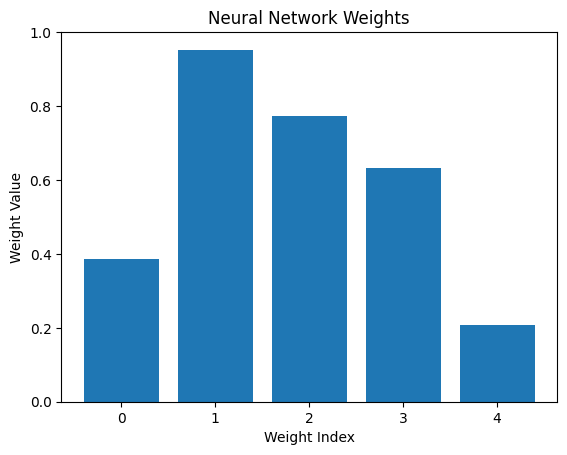

In [9]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()


In [10]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

Epoch: 0, Loss: 1.0274810721164418
Epoch: 10, Loss: 0.86013732997846
Epoch: 20, Loss: 0.8438978239449463
Epoch: 30, Loss: 0.8300918306661468
Epoch: 40, Loss: 0.8176559970094317
Epoch: 50, Loss: 0.8063739656839145
Epoch: 60, Loss: 0.7960630731934174
Epoch: 70, Loss: 0.7865620123624951
Epoch: 80, Loss: 0.7777264764635413
Epoch: 90, Loss: 0.7694268845477061
Epoch: 100, Loss: 0.7615471913422297
Epoch: 110, Loss: 0.7539841876959731
Epoch: 120, Loss: 0.7466469534053727
Epoch: 130, Loss: 0.7394562911638981
Epoch: 140, Loss: 0.7323440740023891
Epoch: 150, Loss: 0.7252524980859958
Epoch: 160, Loss: 0.7181332626483866
Epoch: 170, Loss: 0.7109467100270327
Epoch: 180, Loss: 0.7036609590260455
Epoch: 190, Loss: 0.6962510595294821
Epoch: 200, Loss: 0.6886981888681072
Epoch: 210, Loss: 0.6809889029537274
Epoch: 220, Loss: 0.6731144487089833
Epoch: 230, Loss: 0.6650701392720179
Epoch: 240, Loss: 0.6568547898958008
Epoch: 250, Loss: 0.6484702102352868
Epoch: 260, Loss: 0.6399207475752121
Epoch: 270, Lo

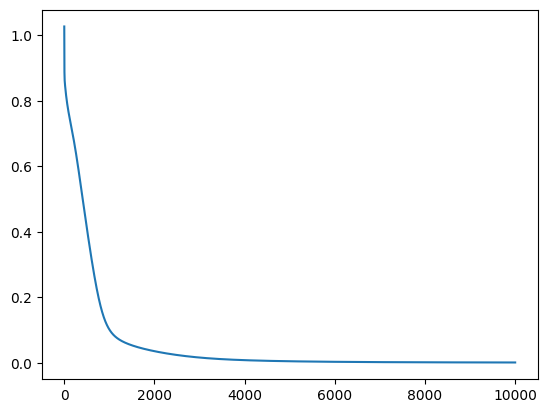

In [11]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), 0.1, 10000)

plt.plot(losses)

In [12]:
y_hat.T * np.expand_dims(norm.std["y"], axis=0) + np.expand_dims(norm.mean["y"], axis=0)


array([[ 79.42237573],
       [ 85.1838788 ],
       [ 46.80283445],
       [134.13919472],
       [ 84.77144464],
       [132.98062527],
       [127.66056029],
       [105.71536592],
       [133.95388985],
       [103.65830107],
       [ 74.72328752],
       [ 76.07575077],
       [ 81.35991473],
       [119.07605291],
       [ 46.93034286],
       [115.8931989 ],
       [109.28613616],
       [ 58.7922723 ],
       [ 67.47310518],
       [ 93.22311465],
       [109.12800565],
       [134.80260649],
       [116.8561141 ],
       [ 98.47623834],
       [124.58916311],
       [ 60.51657373],
       [ 68.48365271],
       [122.79971059],
       [110.78624441],
       [ 65.45141739],
       [ 47.27444669],
       [ 55.92392599],
       [ 63.09975438],
       [ 89.65365639],
       [ 61.27417199],
       [113.21442924],
       [ 44.33679192],
       [ 79.00635029],
       [ 93.2225837 ],
       [ 43.81888832],
       [ 99.98419204],
       [ 57.54013881],
       [ 77.32600284],
       [106

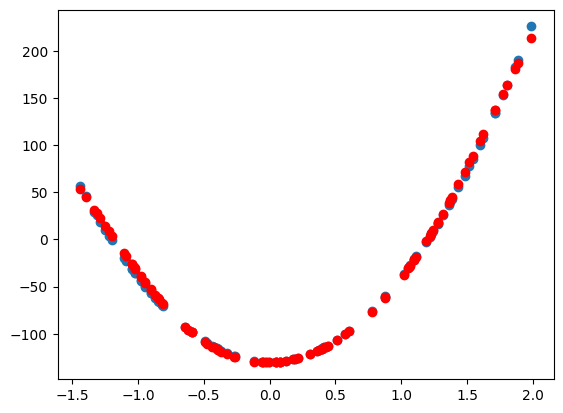

In [13]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [14]:
square_simple_test_norm["y"].shape
y_hat.flatten().shape


(100,)

In [15]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").flatten())**2)
mse

7.299194628627481

more layers

In [28]:
layers = [
    {"output_dim": 10, "activation": "sigmoid"},
    {"output_dim": 5, "activation": "sigmoid"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]])

In [29]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.1, epochs=100000)

Epoch: 0, Loss: 1.8738333642221727
Epoch: 10, Loss: 0.979517883699195
Epoch: 20, Loss: 0.9788370025082674
Epoch: 30, Loss: 0.9781517163517957
Epoch: 40, Loss: 0.9774601262421687
Epoch: 50, Loss: 0.9767612510683922
Epoch: 60, Loss: 0.9760540982947735
Epoch: 70, Loss: 0.9753376605997357
Epoch: 80, Loss: 0.9746109125441963
Epoch: 90, Loss: 0.9738728072527452
Epoch: 100, Loss: 0.9731222730952973
Epoch: 110, Loss: 0.9723582103588019
Epoch: 120, Loss: 0.9715794879006239
Epoch: 130, Loss: 0.9707849397773874
Epoch: 140, Loss: 0.9699733618454595
Epoch: 150, Loss: 0.969143508331933
Epoch: 160, Loss: 0.9682940883779872
Epoch: 170, Loss: 0.9674237625599663
Epoch: 180, Loss: 0.9665311393974679
Epoch: 190, Loss: 0.9656147718623118
Epoch: 200, Loss: 0.9646731539074952
Epoch: 210, Loss: 0.9637047170412739
Epoch: 220, Loss: 0.9627078269784205
Epoch: 230, Loss: 0.9616807804085545
Epoch: 240, Loss: 0.9606218019303445
Epoch: 250, Loss: 0.959529041210339
Epoch: 260, Loss: 0.958400570436257
Epoch: 270, Loss

Epoch: 690, Loss: 0.8433509761169787
Epoch: 700, Loss: 0.8385766490630165
Epoch: 710, Loss: 0.8336957505661813
Epoch: 720, Loss: 0.8287077376193339
Epoch: 730, Loss: 0.8236121043267058
Epoch: 740, Loss: 0.8184083998849216
Epoch: 750, Loss: 0.813096243084858
Epoch: 760, Loss: 0.807675332640862
Epoch: 770, Loss: 0.8021454530104954
Epoch: 780, Loss: 0.796506475704327
Epoch: 790, Loss: 0.7907583563807283
Epoch: 800, Loss: 0.7849011282615161
Epoch: 810, Loss: 0.7789348925833093
Epoch: 820, Loss: 0.7728598069148346
Epoch: 830, Loss: 0.7666760722244674
Epoch: 840, Loss: 0.7603839195806068
Epoch: 850, Loss: 0.7539835973177337
Epoch: 860, Loss: 0.7474753594121124
Epoch: 870, Loss: 0.7408594556926714
Epoch: 880, Loss: 0.7341361243743375
Epoch: 890, Loss: 0.7273055872523441
Epoch: 900, Loss: 0.720368047745555
Epoch: 910, Loss: 0.7133236918324662
Epoch: 920, Loss: 0.7061726917919998
Epoch: 930, Loss: 0.698915212547843
Epoch: 940, Loss: 0.6915514203240491
Epoch: 950, Loss: 0.6840814932533577
Epoch:

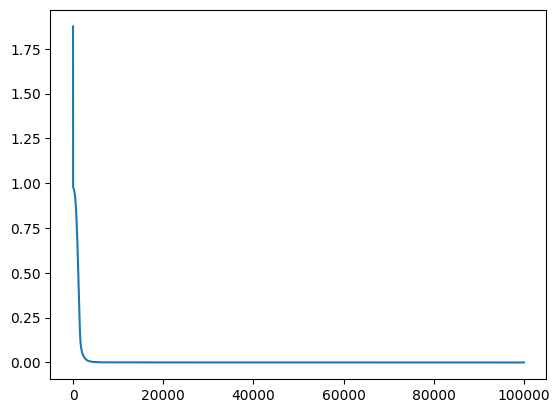

In [30]:
plt.plot(losses)

MSE on training data:  4.038265183807285


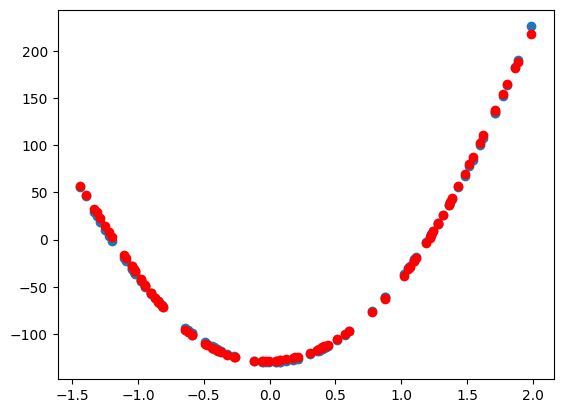

In [ ]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

## steps small 

In [1]:
layers = [
    {"output_dim": 10, "activation": "relu", "init_method": "he"},
    {"output_dim": 10, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init_method": "he"},

    {"activation": "linear"}
]

norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


NameError: name 'networks' is not defined

In [213]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]])


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.5, 10000)


Epoch: 0, Loss: 2.629371395490574
Epoch: 10, Loss: 0.37279324705404504
Epoch: 20, Loss: 0.25251747831135246
Epoch: 30, Loss: 0.2183519819011226
Epoch: 40, Loss: 0.20938092119131682
Epoch: 50, Loss: 0.2059712687922206
Epoch: 60, Loss: 0.20325873977466175
Epoch: 70, Loss: 0.19883609559022716
Epoch: 80, Loss: 0.18252660580916355
Epoch: 90, Loss: 0.13849476264114882
Epoch: 100, Loss: 0.1610856915372639
Epoch: 110, Loss: 0.44590754947917316
Epoch: 120, Loss: 0.3498128818949182
Epoch: 130, Loss: 0.31344815779002483
Epoch: 140, Loss: 0.27546057594530426
Epoch: 150, Loss: 0.2504441247139356
Epoch: 160, Loss: 0.23003458009733674
Epoch: 170, Loss: 0.22288607383752798
Epoch: 180, Loss: 0.2464514513546328
Epoch: 190, Loss: 0.29607876558519186
Epoch: 200, Loss: 0.2862525390044628
Epoch: 210, Loss: 0.24644478798944042
Epoch: 220, Loss: 0.22709178572299252
Epoch: 230, Loss: 0.2164353671544056
Epoch: 240, Loss: 0.2092995145619458
Epoch: 250, Loss: 0.20235198256382675
Epoch: 260, Loss: 0.19623843792869

Text(0.5, 1.0, 'Training Loss')

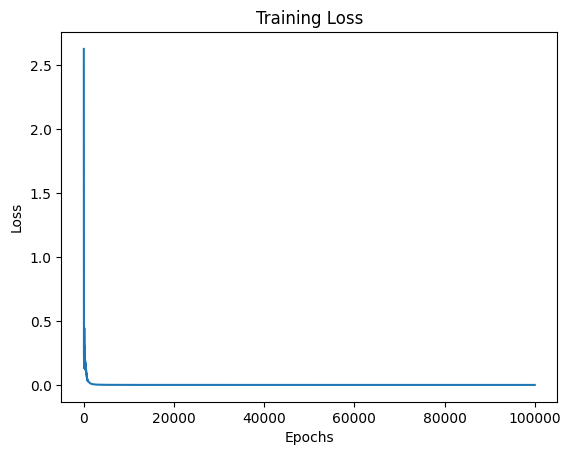

In [214]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

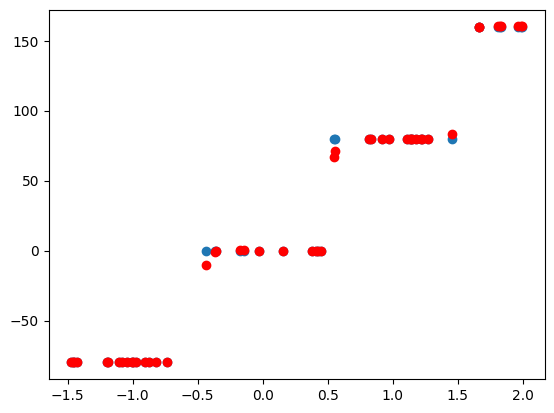

In [215]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T)

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

In [216]:
mse_steps = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
mse_steps

6.983457834350875